# Team Members: Jaden Phan, Sarah Morrison

Dataset: https://www.kaggle.com/datasets/tunguz/nba-forecasts



## Dataset Description
There are two tables provided in this dataset.
1. nba_elo.csv: contains game-by-game "elo" ratings and forecasts back to 1946
2. nba_elo_latest.csv: containts game-by-game "elo" ratings and forecasts for only the latest season.

Both datasets contain the same 24 column attributes. Here are the most important attributes to our study:
* date: yyyy-mm-dd of the game
* season: yyyy of season
* elo1_pre: rating of each team prior to game
* elo_prob: analyst predicted chance of team winning
* elo_post: rating of each team after the result of the game
* score: score of the game for each team for each game

## We want to predict the playoff status of the team the following year.


## Implementation/Technical Merit
* This dataset lacks documentation so we will need to spend some time understanding each attribute as well as deciding units for numerical values.
* There are some attributes with obscure names that we will need to understand as well.
* About 50% of the attributes have a majority of NULL values so we will need to decide how to interpret and handle these missing values.
* Our dataset is about 71,000 instances of data, we will likely need to randomly sample or cut down the size of samples in-order to reduce computing time. That being said having such a large dataset allows us to have a large amount of diversity in our data regardless of how we split or sample.

## Potential Impact of Results

Teams:

This could be useful for the teams in terms of strategy and management. It could also help the teams manage their fan engagement and marketing for the upcoming season.

Fans:

For fans, this could be useful for betting. This could also be useful for fans for increased general interest in their team, or rival teams.


In [25]:
# some useful mysklearn package import statements and reloads
import importlib
import pandas as pd
import matplotlib.pyplot as plt

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

# uncomment once you paste your mypytable.py into mysklearn package
import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

# uncomment once you paste your myclassifiers.py into mysklearn package
import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyDummyClassifier, MyNaiveBayesClassifier, MyDecisionTreeClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

df = MyPyTable().load_from_file('input_data/nba_elo.csv')  # Replace with the correct filename



# EDA - Visualizations

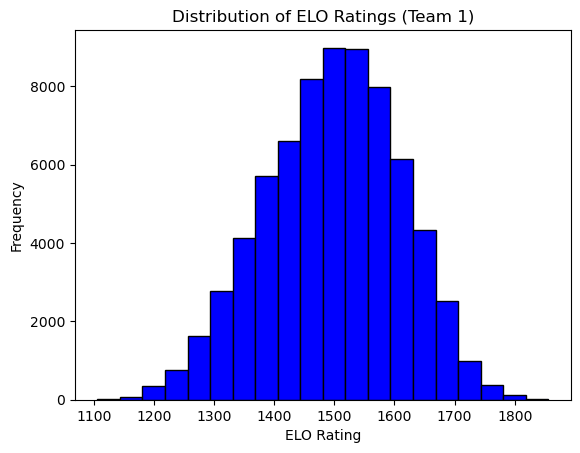

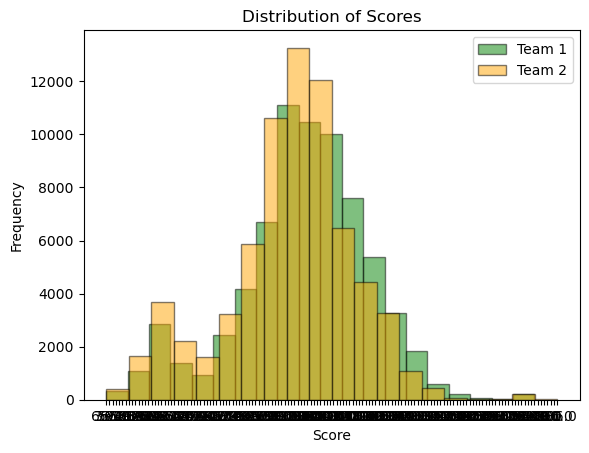

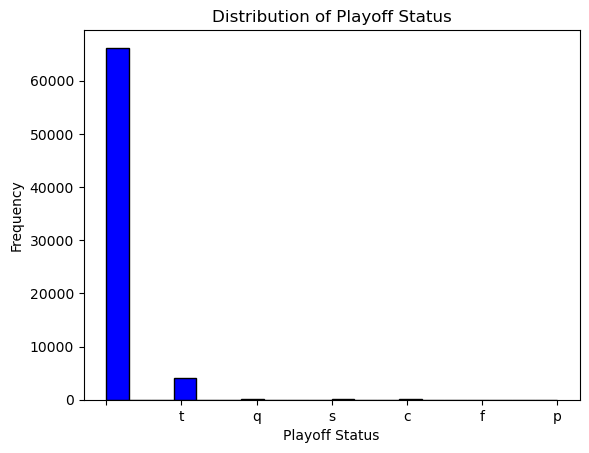

In [ ]:
# Distribution of ELO ratings
plt.hist(df.get_column('elo1_pre'), bins=20, color='blue', edgecolor='black')
plt.title("Distribution of ELO Ratings (Team 1)")
plt.xlabel("ELO Rating")
plt.ylabel("Frequency")
plt.show()

# Distribution of ELO ratings
plt.hist(df.get_column('elo2_pre'), bins=20, color='blue', edgecolor='black')
plt.title("Distribution of ELO Ratings (Team 2)")
plt.xlabel("ELO Rating")
plt.ylabel("Frequency")
plt.show()

# Distribution of Scores
plt.hist(df.get_column('score1'), bins=20, alpha=0.5, label='Team 1', color='green', edgecolor='black')
plt.hist(df.get_column('score2'), bins=20, alpha=0.5, label='Team 2', color='orange', edgecolor='black')
plt.title("Distribution of Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()


plt.hist(df.get_column('playoff'), bins=20, color='blue', edgecolor='black')
plt.title("Distribution of Playoff Status")
plt.xlabel("Playoff Status")
plt.ylabel("Frequency")
plt.show()

# Preliminary Classification using mysklearn

In [27]:
from mysklearn.myclassifiers import MyKNeighborsClassifier
from mysklearn.myevaluation import train_test_split, accuracy_score, confusion_matrix, binary_precision_score, binary_recall_score, binary_f1_score
from mysklearn.mypytable import MyPyTable

# Load dataset
file_path = "input_data/nba_elo.csv"  # Adjust this path if needed
table = MyPyTable().load_from_file(file_path)

# Dataset preprocessing for avg_elo1_pre, avg_elo_prob1, win_percentage classification
selected_columns_subset = ["elo1_pre", "elo_prob1", "elo2_pre", "elo_prob2"]
column_indices_subset = [table.column_names.index(col) for col in selected_columns_subset]

filtered_table_avg = MyPyTable(
    column_names=selected_columns_subset,
    data=[[row[i] for i in column_indices_subset] for row in table.data]
)

X_seed = [row[:-1] for row in filtered_table_avg.data]
y_seed = [row[-1] for row in filtered_table_avg.data]

X_train_avg, X_test_avg, y_train_avg, y_test_avg = train_test_split(X_seed, y_seed, test_size=0.2, random_state=42)

X_subset = [row[:-1] for row in filtered_table_avg.data]
y_subset = [row[-1] for row in filtered_table_avg.data]


## Dummy Classifier

In [28]:
# Initialize the dummy classifier
dummy_clf = MyDummyClassifier()

# Fit the classifier on the training data
dummy_clf.fit(X_train_avg, y_train_avg)

# Predict the labels for the test data
y_pred_dummy = dummy_clf.predict(X_test_avg)

# Evaluate the accuracy of the predictions
accuracy = accuracy_score(y_test_avg, y_pred_dummy)
print(f"Accuracy of MyDummyClassifier: {accuracy}")

Accuracy of MyDummyClassifier: 0.00014158289678606824


## Naive Bayes

In [ ]:
# Initialize the Naive Bayes classifier
nb_clf = MyNaiveBayesClassifier()

# Fit the classifier on the training data
nb_clf.fit(X_train_avg, y_train_avg)

# Predict the labels for the test data
y_pred_nb = nb_clf.predict(X_test_avg)

# Evaluate the accuracy of the predictions
accuracy_nb = accuracy_score(y_test_avg, y_pred_nb)
print(f"Accuracy of MyNaiveBayesClassifier: {accuracy_nb}")

Priors: {0.5705091792086796: 3.5396350636249403e-05, 0.11781232720137036: 1.7698175318124702e-05, 0.23356203851981694: 1.7698175318124702e-05, 0.296497792620969: 1.7698175318124702e-05, 0.16356754199845502: 1.7698175318124702e-05, 0.7464155239797539: 1.7698175318124702e-05, 0.22226462738408959: 1.7698175318124702e-05, 0.36959382602707647: 1.7698175318124702e-05, 0.2647028568894155: 1.7698175318124702e-05, 0.23096384787664237: 1.7698175318124702e-05, 0.11087339718336497: 1.7698175318124702e-05, 0.39228774679510614: 1.7698175318124702e-05, 0.40667896563431205: 1.7698175318124702e-05, 0.3596488594658733: 1.7698175318124702e-05, 0.534234721084853: 1.7698175318124702e-05, 0.13150665860978017: 1.7698175318124702e-05, 0.363982070442462: 1.7698175318124702e-05, 0.6676196398089187: 1.7698175318124702e-05, 0.46686994471610943: 1.7698175318124702e-05, 0.49983273646346604: 3.5396350636249403e-05, 0.3076798091835806: 1.7698175318124702e-05, 0.5554250645098939: 1.7698175318124702e-05, 0.213930495931